In [1]:
using Plots
using LaTeXStrings
using Statistics
using ProgressMeter

In [2]:
function container(density::Float64, L::Int)
    C = zeros(Bool, L)
    while round(mean(C), digits = 1) != density
        i = rand(1:L)
        C[i] == 0 && (C[i] += 1)
    end
    
    return C
end

container (generic function with 1 method)

In [3]:
function update(container::Vector{Bool}, q::Float64, α::Float64, β::Float64)
    L = length(container)
    rand() <= α && container[1] == 0 && (container[1] += 1)
    temp = container
    for i in 1:L-1
        k = rand(1:L-1)
        if rand() <= q && temp[i] == 1 && temp[i+1] == 0
            temp[i+1] += 1
            temp[i] -= 1
        end
        container = temp
    end
    rand() <= β && container[L] == 1 && (container[L] -= 1)
    return container
end

update (generic function with 1 method)

In [4]:
function frequency(container::Vector{Bool}, time::Int; 
        q::Float64, α::Float64, β::Float64)
    frequency = zeros(Int, length(container))
    for _ in 1:1000 # thermalise
        container = update(container, q, α, β)
    end
    
    for t in 1:time
        container = update(container, q, α, β)
        #if t%10 == 0
        frequency .+= container
        #end
    end
    return frequency
end

frequency (generic function with 1 method)

In [5]:
A = [0.1, 0.4, 1.0]
B = [0.1, 0.6, 1.0]
sites = collect(1:100)
P = Any[]

for α in A
    for β in B
        c = container(0.4, 100)
        d = frequency(c, 10000, q = 0.95, α = α, β = β)/10000
        p = plot(sites, d, xlabel = "Sites", ylabel = "Local Density", 
            legend = false, title = L"$\alpha = %$(α), \beta = %$(β)$", 
            ylim = (0.0, maximum(d)+0.1))
        push!(P, p)
    end
end

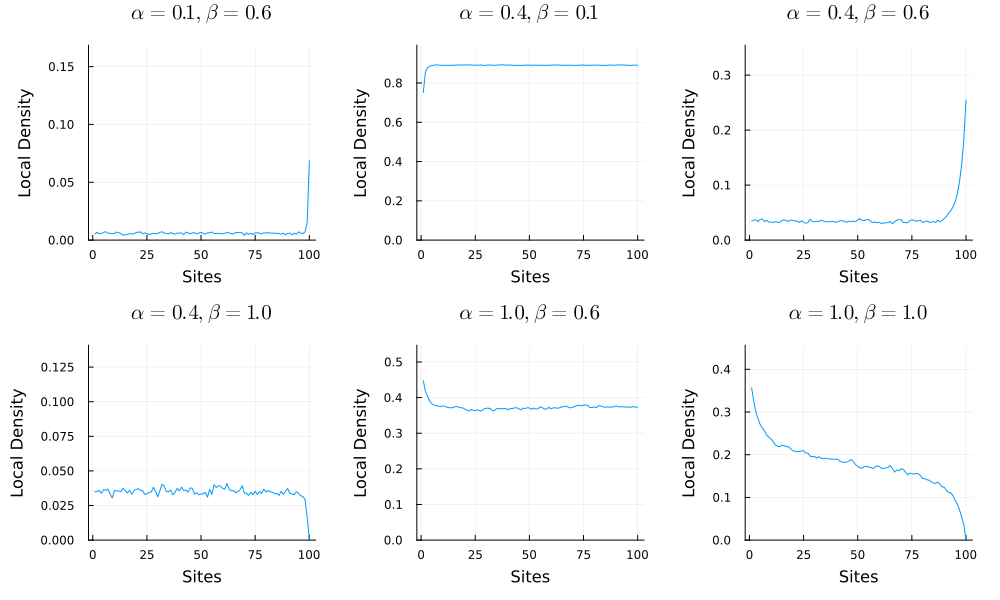

In [6]:
plot(P[2], P[4], P[5], P[6], P[8], P[9], layout = (2,3), size = (1000, 600), margin = 5*Plots.mm)
#savefig("ASEP_OBC_profiles")

In [7]:
P = [0.2:0.01:0.9;]

D_A = Vector{Vector{Float64}}()
J_A = Vector{Vector{Float64}}()
@showprogress for α in P
    D_B = Float64[]
    J_B = Float64[]
    for β in P
        c = container(0.0, 100)
        f = frequency(c, 5000, q = 0.75, α = α, β = β)
        d = mean(f/5000)
        push!(D_B, d)
        push!(J_B, 0.75*d*(1-d))
    end
    push!(D_A, D_B)
    push!(J_A, J_B)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:43


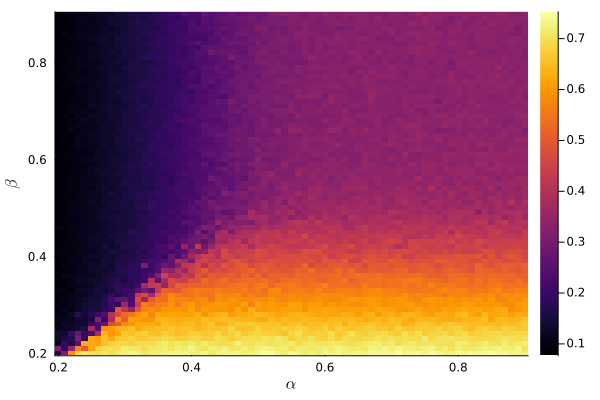

In [8]:
D = hcat(D_A...)
heatmap(P, P, D, c=:auto, xlabel = L"$\alpha$", ylabel = L"$\beta$")

In [9]:
savefig("Density_Grid")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Agents\\Density_Grid.png"

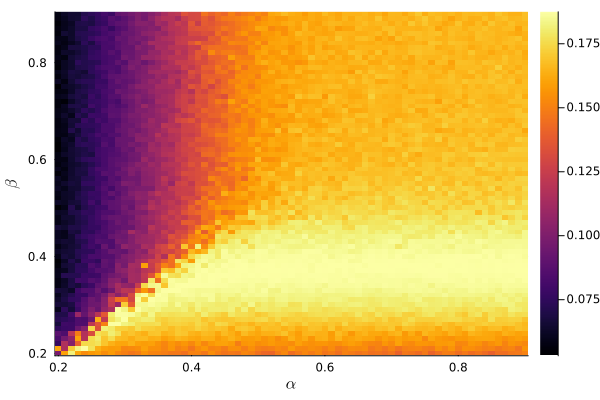

In [10]:
J = hcat(J_A...)
heatmap(P, P, J, c=:auto, xlabel = L"$\alpha$", ylabel = L"$\beta$")

In [11]:
savefig("Current_Grid")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Agents\\Current_Grid.png"

In [12]:
P = [0.2:0.005:0.5;]

D_A = Vector{Vector{Float64}}()
@showprogress for α in P
    D_B = Float64[]
    J_B = Float64[]
    for β in P
        c = container(0.0, 100)
        d = frequency(c, 5000, q = 0.75, α = α, β = β)/5000
        Δd = d[begin] - d[end]
        push!(D_B, Δd)
    end
    push!(D_A, D_B)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:30


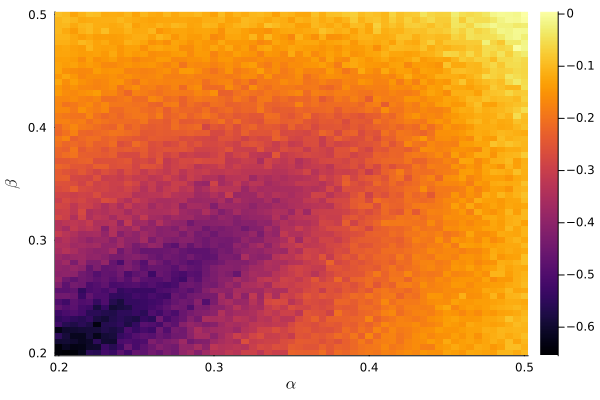

In [13]:
D = hcat(D_A...)
heatmap(P, P, D, c=:auto, xlabel = L"$\alpha$", ylabel = L"$\beta$")

In [14]:
savefig("Delta_Density_Grid")

"D:\\M.Sc. Courses\\3. SoSe 2022\\4. Data Analysis in Physics and Astronomy\\Exercises\\Agents\\Delta_Density_Grid.png"